In [6]:
import tensorflow as tf
print(tf.__version__)
#!pip install tensorflow==2.0.0-alpha0

2.0.0-alpha0


In [0]:
import tensorflow_datasets as tfds
import json

In [0]:
imdb,info = tfds.load("imdb_reviews",with_info = True, as_supervised=True)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

In [0]:
train_data = imdb['train']
test_data = imdb['test']

training_sentences=[]
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
vocab_size = 10000
embedding_dim = 16
oov_tok ="<OOV>"
max_length = 100
trunc_type = "post"
pad_type = "post"


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [0]:
sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(sequences,maxlen = max_length, padding = "post", truncating=trunc_type)

testing_seq = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_seq,maxlen = max_length, padding = "post", truncating=trunc_type)


In [0]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [29]:
la = np.array([1,2,3])
la.shape

(3,)

In [36]:
from tensorflow.keras.layers import LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.AveragePooling1D(),
    tf.keras.layers.Bidirectional(LSTM(64,input_shape = (embedding_dim*max_length,))),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
average_pooling1d_3 (Average (None, 50, 16)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               41472     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 209,793
Trainable params: 209,793
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 10
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(testing_padded,testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 86s 3ms/sample - loss: 0.3446 - accuracy: 0.8527 - val_loss: 0.4111 - val_accuracy: 0.8097
Epoch 2/10
25000/25000 [==============================] - 85s 3ms/sample - loss: 0.2773 - accuracy: 0.8882 - val_loss: 0.4158 - val_accuracy: 0.8101
Epoch 3/10
25000/25000 [==============================] - 84s 3ms/sample - loss: 0.2249 - accuracy: 0.9124 - val_loss: 0.5588 - val_accuracy: 0.7700
Epoch 4/10
25000/25000 [==============================] - 83s 3ms/sample - loss: 0.1769 - accuracy: 0.9348 - val_loss: 0.5264 - val_accuracy: 0.7932
Epoch 5/10
25000/25000 [==============================] - 83s 3ms/sample - loss: 0.1238 - accuracy: 0.9556 - val_loss: 0.6948 - val_accuracy: 0.7841
Epoch 6/10
25000/25000 [==============================] - 84s 3ms/sample - loss: 0.0822 - accuracy: 0.9714 - val_loss: 0.7383 - val_accuracy: 0.7831
Epoch 7/10
25000/25000 [==============================] 

In [46]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.AveragePooling1D(),
    tf.keras.layers.Bidirectional(LSTM(64,input_shape = (embedding_dim*max_length,))),
    tf.keras.layers.Dropout(rate = 0.4),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.28),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
average_pooling1d_3 (Average (None, 50, 16)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               41472     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 209,793
Trainable params: 209,793
Non-trainable params: 0
_________________________________________________________________


In [47]:
num_epochs = 10
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history2 = model2.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(testing_padded,testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 61s 2ms/sample - loss: 0.4663 - accuracy: 0.7672 - val_loss: 0.4251 - val_accuracy: 0.8015
Epoch 2/10
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.3099 - accuracy: 0.8744 - val_loss: 0.4213 - val_accuracy: 0.8141
Epoch 3/10
25000/25000 [==============================] - 61s 2ms/sample - loss: 0.2598 - accuracy: 0.8966 - val_loss: 0.4358 - val_accuracy: 0.8037
Epoch 4/10
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.2110 - accuracy: 0.9202 - val_loss: 0.5255 - val_accuracy: 0.7988
Epoch 5/10
25000/25000 [==============================] - 61s 2ms/sample - loss: 0.1621 - accuracy: 0.9400 - val_loss: 0.7718 - val_accuracy: 0.7748
Epoch 6/10
25000/25000 [==============================] - 61s 2ms/sample - loss: 0.1200 - accuracy: 0.9578 - val_loss: 0.6721 - val_accuracy: 0.7835
Epoch 7/10
25000/25000 [==============================] 

In [0]:
import matplotlib.pyplot as plt
def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

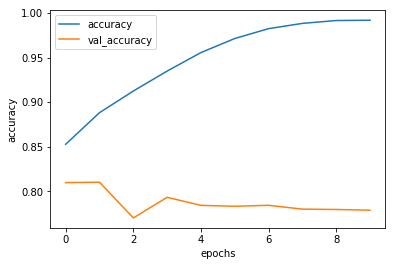

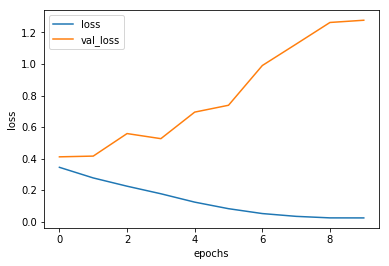

In [53]:
plot_graph(history,'accuracy')
plot_graph(history,'loss')

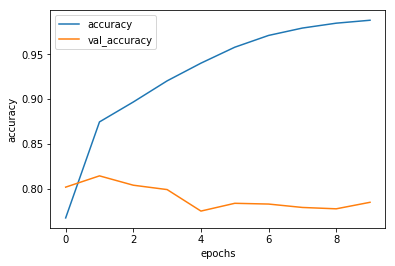

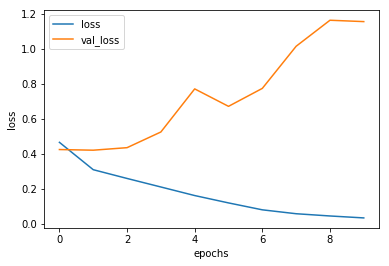

In [54]:
plot_graph(history2,'accuracy')
plot_graph(history2,'loss')